<a href="https://colab.research.google.com/github/enispeterpaul/hello-world/blob/master/FERTIG_Object_Detection_Frames.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 577 kB 12.8 MB/s 
     |████████████████████████████████| 232 kB 53.6 MB/s 
     |████████████████████████████████| 54 kB 2.6 MB/s 
     |████████████████████████████████| 48 kB 5.6 MB/s 
     |████████████████████████████████| 4.0 MB 68.9 MB/s 
  Created wheel for tensorflow-object-detection-api: filename=tensorflow_object_detection_api-0.1.1-py3-none-any.whl size=844512 sha256=9e792f0b9a99d988bc2451160b33f5549b5817f62316b326aa45cec9d1a7c9ea
  Stored in directory: /root/.cache/pip/wheels/71/7e/a2/461ab817fbaef68ec9cc60df16d3669d1285f032e4c98179bf
Successfully built tensorflow-object-detection-api
TensorFlow 1.x selected.
Instructions for updating:
non-resource variables are not supported in the long term



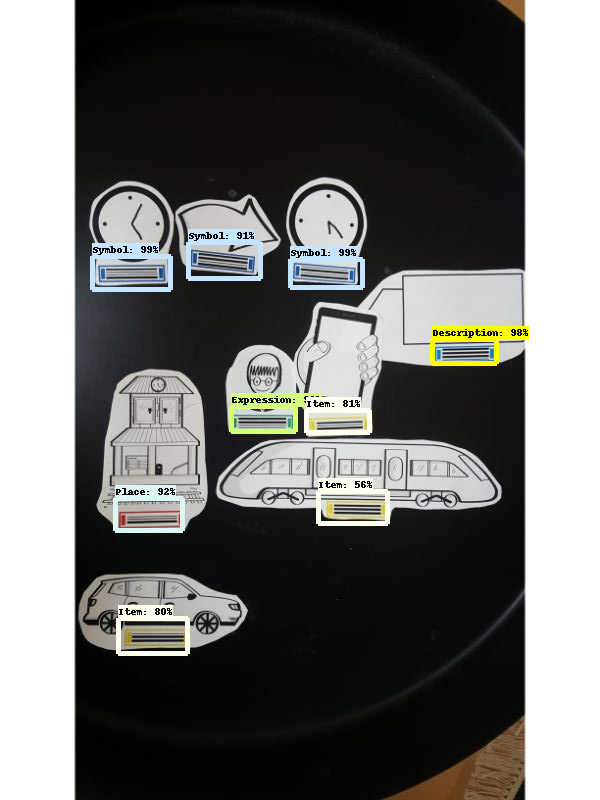

In [ ]:
### Image object detection of frames ###
#
# Author: David Zahn
# Date: 02.05.2022
# Description: 
# This program uses a TensorFlow-trained neural network to perform object detection.
# It loads pre-trained neural networks (inference graphs), the respective label map and the image for detection from Google Drive
# It draws boxes, scores, and labels around the objects of interest in the image.
# It then outputs the coordinates of the generated bounding boxes

# Source: https://github.com/EdjeElectronics/TensorFlow-Object-Detection-API-Tutorial-Train-Multiple-Objects-Windows-10
# Date: 14.04.2022 23:04 Uhr
# The original code is from the github tutorial above.
# I used the code provided in the Object_detection_image.py file, but made various changes to adapt it to the use in Google Colab

# Google Colab resets after 24h and deletes all manually uploaded data (e.g. frozen inference graphs, label map, images).
# Hence the data needed is stored in my personal Google Drive. 
# Before running the Colab the Google Drive must be manually connected to the Colab via the respective button in the data section of the Colab


# install & import packages
!pip install utils
!pip install tensorflow-object-detection-api

import os
import cv2
import numpy as np
%tensorflow_version 1.x
import tensorflow.compat.v1 as tf 
tf.disable_v2_behavior()
import sys



# This is needed to avoid cv errors that are unique to colab
from google.colab.patches import cv2_imshow

# This is needed since the notebook is stored in the object_detection folder.
#sys.path.append("..")

#import utilities (adapted)
from object_detection.utils import label_map_util
from object_detection.utils import visualization_utils as vis_util

# name of the directories in the Google Drive
MODEL_NAME = '/content/drive/MyDrive/Data_MA/Frames'
IMAGE_NAME = '/content/drive/MyDrive/Data_MA/Frames/test1.jpg'


# Grab path to current working directory
CWD_PATH = os.getcwd()

# Path to frozen detection graph .pb file, which contains the model that is used
# for object detection.
PATH_TO_CKPT = os.path.join(CWD_PATH,MODEL_NAME,'frozen_inference_graph.pb')

# Path to label map file
PATH_TO_LABELS = os.path.join('/content/drive/MyDrive/Data_MA/Frames/labelmap.pbtxt')

# Path to image
PATH_TO_IMAGE = os.path.join(CWD_PATH,IMAGE_NAME)

# Number of classes the object detector can identify
NUM_CLASSES = 6

# Load the label map.
# Label maps map indices to category names, so that when our convolution
# network predicts `5`, we know that this corresponds to `king`.
# Here we use internal utility functions, but anything that returns a
# dictionary mapping integers to appropriate string labels would be fine
label_map = label_map_util.load_labelmap(PATH_TO_LABELS)
categories = label_map_util.convert_label_map_to_categories(label_map, max_num_classes=NUM_CLASSES, use_display_name=True)
category_index = label_map_util.create_category_index(categories)

# Load the Tensorflow model into memory.
detection_graph = tf.Graph()
with detection_graph.as_default():
    od_graph_def = tf.GraphDef()
    with tf.gfile.GFile(PATH_TO_CKPT, 'rb') as fid:
        serialized_graph = fid.read()
        od_graph_def.ParseFromString(serialized_graph)
        tf.import_graph_def(od_graph_def, name='')

    sess = tf.Session(graph=detection_graph)

# Define input and output tensors (i.e. data) for the object detection classifier

# Input tensor is the image
image_tensor = detection_graph.get_tensor_by_name('image_tensor:0')

# Output tensors are the detection boxes, scores, and classes
# Each box represents a part of the image where a particular object was detected
detection_boxes = detection_graph.get_tensor_by_name('detection_boxes:0')

# Each score represents level of confidence for each of the objects.
# The score is shown on the result image, together with the class label.
detection_scores = detection_graph.get_tensor_by_name('detection_scores:0')
detection_classes = detection_graph.get_tensor_by_name('detection_classes:0')

# Number of objects detected
num_detections = detection_graph.get_tensor_by_name('num_detections:0')

# Load image using OpenCV and
# expand image dimensions to have shape: [1, None, None, 3]
# i.e. a single-column array, where each item in the column has the pixel RGB value
image = cv2.imread(PATH_TO_IMAGE)
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
image_expanded = np.expand_dims(image_rgb, axis=0)

# Perform the actual detection by running the model with the image as input
(boxes, scores, classes, num) = sess.run(
    [detection_boxes, detection_scores, detection_classes, num_detections],
    feed_dict={image_tensor: image_expanded})

# Draw the results of the detection (aka 'visulaize the results')

vis_util.visualize_boxes_and_labels_on_image_array(
    image,
    np.squeeze(boxes),
    np.squeeze(classes).astype(np.int32),
    np.squeeze(scores),
    category_index,
    use_normalized_coordinates=True,
    line_thickness=5,
    min_score_thresh=0.50)



# All the results have been drawn on image. Now display the image.
#cv2.imshow('Object detector', image)
#cv2_imshow('Object detector')
cv2_imshow(image)
# Press any key to close the image
#cv2.waitKey(0)

# Clean up
#cv2.destroyAllWindows()


In [ ]:
  # Source: https://stackoverflow.com/questions/54537389/coordinates-of-bounding-box-in-tensorflow
  # Date: 02.05.2022 13:10 Uhr
  # I used the code provided on the website above and changed some aspects of the code so that it runs in this colab
  # The code outputs the coordinates of the detected bounding boxes in the format [ymin xmin ymax xmax]
  # The data can be interpreted as relative values of the size of the original image with the bottom left corner being the (0,0) and the upper right corner (100,100)
  # e.g. xmin = 0,22 --> the point of the bounding box that is the furthest "left" is at 22% of the width of the original image

  (boxes, scores, classes, num) = sess.run(
      [detection_boxes, detection_scores, detection_classes, num_detections],
      feed_dict={image_tensor: image_expanded})
  indexes = []
  import os
  for i in range (classes.size):
    if(classes[0][i] in range(1,91) and scores[0][i]>0.5):
        indexes.append(i)
  filtered_boxes = boxes[0][indexes, ...]
  filtered_scores = scores[0][indexes, ...]
  filtered_classes = classes[0][indexes, ...]
  filtered_classes = list(set(filtered_classes))
  filtered_classes = [int(i) for i in filtered_classes]

  print(filtered_boxes)
  # Format:  [ymin xmin ymax xmax]

[[0.50846434 0.38529494 0.5394546  0.49194816]
 [0.32452795 0.4846167  0.35979715 0.6039223 ]
 [0.32016012 0.15433636 0.36164573 0.283736  ]
 [0.424433   0.72072005 0.45463735 0.82704365]
 [0.62282526 0.19214785 0.6634474  0.30436027]
 [0.30357274 0.31446382 0.34854057 0.43499246]
 [0.51350313 0.5116348  0.540613   0.61639833]
 [0.7732054  0.19744024 0.81659937 0.31305006]
 [0.61406696 0.5312361  0.6546587  0.6451444 ]]
